# Titanic Project -- Catherine Yijie(SHEN)




# 0. Importing libraries & useful starting lines


Begin by importing libraries.
* **Numpy**: This gives us the benefit of numpy arrays, this allows us the use of vectorised operations, this is faster than using loops. It is also the base for the other packages
* **Matplotlib**: for plotting and visualisations
* **Pandas** : This library is useful in machine learning, it enables the easy importation and manipulation of data; the pandas's dataframe is very easy and useful to work with, it also works well with other libraries becuase it gives the data some standard structure
* **Seaborn**: This package is for plotting and statistics
* **Math**: This package allows the use of some basic math functions
* **Linalg**: The functions from linalg are useful since vectorised operations are used frequently 

In [ ]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math 
from numpy import linalg as la
%load_ext autoreload
%autoreload 2

# 1. Midterm - Titanic project

This project is a **binary classification problem**, where we have to **predict the likelihood** of passengers  surviving the Titanic accident based on some passenger attributes such as: **Name** , **Gender** , **Age** , **Number of siblings** , **Number of parents/children aboard** , **Class type** , **Fare**.

Solving this problem, allows us to answer questions like: *What kind of people were more likely to survive Titanic?* ; *Did older people had better chance of surviving?* etc.


## 1.1 Import the data 


The data was imported from a csv using the pandas library. The datatype was **pandas dataframe**, with dimension of **887 rows** (passengers) and **8 columns  (attributes)** including the headings.

In [ ]:
# Import the data using pandas library 
training_data = pd.read_csv('titanic.csv')
type(training_data)

pandas.core.frame.DataFrame

In [ ]:
# Check the shape of the training data 
training_data.shape

(887, 8)

In [ ]:
# Check the columns of the data
training_data.columns 

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [ ]:
# See first 10 rows of the data and headings 
training_data.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


Looking at the first 10 passenger , a general idea of the data can be realised, what they are, and what values they can take, it will be analysed in more detail in the next section:
* **Survived** : **Binary label**, shows if the passenger has survived, it can take two values 0 and 1 (where 0 = die, 1=survived)
* **Pclass** : Class the passanger travelled, where the values can be 1, 2, or 3. The  number means higher class.
* **Name** : Passanger name (string)
* **Sex** : Passanger Gender  (string)
* **Age** : PassangerAge in years (continuous values) 
* **Siblings/Spouses Aboard** : Number of siblings or spouses aboard of the passenger (discrete  values)
* **Parents/Children Aboard** : Number of parents or children aboard of the passenger (discrete  values)
* **Fare** : Fare of the ticket (continuous values)

##  1.2 Data Validation

In machine learning much time is spent for the preparation of the data. Before we can use our model, the data must be formatted correctly. 

A prerequisite of this is to validate the data. This process  involves, checking for **missing values**, checking if all values are in he right data type, checking for duplicates and checking for **erroneous values** (**Age** includes a negative number).

In [ ]:
# Check the data for missing values 
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 48.5+ KB


In [ ]:
# Find the number of missing values  
training_data.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

The dataset contains no missing values, if they are present there are different approaches to deal with this:

* **Drop the missing values** with *training_data.dropna()*. This only suggested if the number of missing values is small.

* Alternately **replace the missing values** with the mean using *.mean()* and *.fillna* functions 

In [ ]:
# If we have missing values we can drop them 
# This only suggested if the number of missing values is small

training_data.dropna().head()

# Also we can replace them with the mean using the mean
# We simply take the column heading and .mean()
# We can use .fillna with the mean values when true 

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


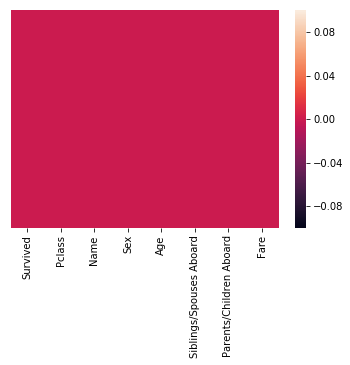

In [ ]:
# Find the location of the missing values
sns.heatmap(training_data.isnull(), yticklabels = False)

Use the *training_data.describe()* function to check for **erroneous values**, this returns the summary statistics.   Check the *min* and *max* values, check if there are no strange values (eg. as mentioned above, negative number for ages or very large values).

In [ ]:
# Check if there is erroneous data
training_data.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


The expected values are checked **categorical variable** (eg. Pclass only 1-2-3). The **unique values** are collected , using *.unique* function. **Discrete values** must be checked ( one cannot have 1.5 Parent/Children aboard).

In [ ]:
# Get the unique values of different coloumns
print(training_data.Survived.unique())
print(training_data.Pclass.unique())
print(training_data['Siblings/Spouses Aboard'].unique())
print(training_data['Parents/Children Aboard'].unique())


[0 1]
[3 1 2]
[1 0 3 4 2 5 8]
[0 1 2 5 3 4 6]


There are **no missing values, nor erroneous values**.

It is worth checking for duplicates within columns which is simple using pandas and also take care of entire repeated columns this is prevalent when multiple columns are added or removed from the dataframe.

## 1.3  Exploratory data analysis (EDA)

The **exploratory data analysis** is performed. It involves looking at  **summary statistics**, and the data using **visual methods** (such as box plot, scatter plot, histogram ect). The data must be understood to select the appropriate plot. 

*Training_data.describe()* is used,  it can be seen which attributes are continuous, which are categorical and also a feel for the data and the spread of values.

In [ ]:
# See the key features of the data 
training_data.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


Summary statistics for some attributes are checked. 

*Age* is chosen as an example of one continous variable, and *Sex* as a categorical variable.


In [ ]:
# We can see the key summary statistics of our continous data 
training_data['Survived'].describe()

count    887.000000
mean       0.385569
std        0.487004
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [ ]:
# We can see the key summary statistics of our catagorical data 
training_data['Sex'].describe()

count      887
unique       2
top       male
freq       573
Name: Sex, dtype: object

In [ ]:
# Number of rows 
print("# of passengers in training data: " + str(len(training_data.index)))

# of passengers in training data: 887


The seaborn package is excellent for plotting it makes use of the regular structure of the pandas datafarme and this simplifies plotting compared with matplotlib. 


Some plots that capture the key features of the data are displayed below

0    545
1    342
Name: Survived, dtype: int64


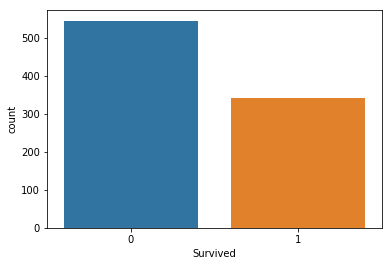

In [ ]:
# Number of people who survive vs died 
print(training_data["Survived"].value_counts())
sns.countplot(x = "Survived", data = training_data)

Number of survivors, grouped by gender.

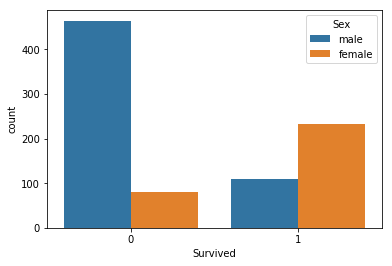

In [ ]:
# Number of surving gender 
# print(training_data["Sex"].value_counts())
# training_data.groupby(["Survived"]).count()
sns.countplot(x = "Survived", hue = "Sex", data = training_data)

Number of survivors, grouped by the class they travelled in.

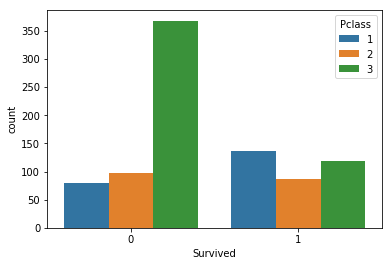

In [ ]:
# Number of surving gender and Pclass 
sns.countplot(x = "Survived", hue = "Pclass", data = training_data)

Distribution of passanger age.

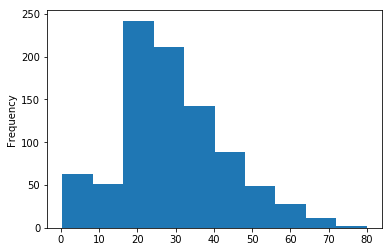

In [ ]:
# Histogram of the age of the passengers 
training_data["Age"].plot.hist()

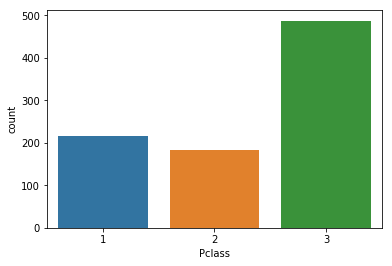

In [ ]:
# Histogram of the passenger class 
sns.countplot(x = "Pclass",data = training_data)

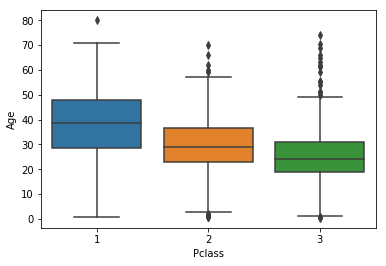

In [ ]:
# Box plot of Pclass and the age 
sns.boxplot( x = "Pclass", y = "Age", data = training_data )

In [ ]:
# Correlation matrix 
training_data.corr()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Survived,1.000000,-0.336528,-0.059665,-0.037082,0.080097,0.256179
Pclass,-0.336528,1.000000,-0.391492,0.085026,0.020252,-0.548919
Age,-0.059665,-0.391492,1.000000,-0.297669,-0.193741,0.112329
Siblings/Spouses Aboard,-0.037082,0.085026,-0.297669,1.000000,0.414244,0.158839
Parents/Children Aboard,0.080097,0.020252,-0.193741,0.414244,1.000000,0.215470
Fare,0.256179,-0.548919,0.112329,0.158839,0.215470,1.000000


Correlation between attributes are displayed it is not advised to simply remove attributed solely based on this without understanding however it must be looked at closely since this will distort the results of our model. 

Consider serial multicollinearity, it would mean that than the rank of the matrix would be less that its dimension this would lead to problems when finding the inverse of the moment matrix (The problem will be ill posed).

In [ ]:
training_data[training_data['Survived'] == 1].corr()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Survived,NaN,NaN,NaN,NaN,NaN,NaN
Pclass,NaN,1.000000,-0.437923,-0.033300,0.021584,-0.538125
Age,NaN,-0.437923,1.000000,-0.138740,-0.308689,0.181396
Siblings/Spouses Aboard,NaN,-0.033300,-0.138740,1.000000,0.282498,0.122886
Parents/Children Aboard,NaN,0.021584,-0.308689,0.282498,1.000000,0.116519
Fare,NaN,-0.538125,0.181396,0.122886,0.116519,1.000000


The correlation between attributes, within classes. 
Attributes which are strongly correlated are candidates to be removed. 

In [ ]:
# First entries of surviving passengers
training_data[training_data['Survived'] == 0].head(6)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
12,0,3,Mr. William Henry Saundercock,male,20.0,0,0,8.0500


## 1.4 Preparing the data

**Feature engineering**. Some features are not in the correct format and cannot be used in our logistic regression model.  

String variables like the names of passengers provide no insight and do not have any predictive power so are removed. 

Some are useful but need to be transformed to **0-1 (binary)** variables such as Sex. Pandas is very helpful here as we can readily create dummy variables and add and remove attributes. In the literature this is known as feauture extraction. 

Changes made to the data:

**1)** **Sex** is changed to a **binary variable  0-1 (where 0 is female and 1 is male)**, there are only two options and absence from one class implies presence in the other thus the inclusion of a single column is sufficient.

**2)** For **Pclass** the same procedure was followed, but here there is **3 categories / different values**, so **2 columns of 0-1 values (if Pcl2 = 1, the passengers  travelled in 2nd class; for Pc2 = 1 they travelled in 2nd class; and if both Pcl1 = Pcl2 = 0 then they travelled in 1st class)** are neccassery.

**3)**  Concatenate the new columns and drop those not suitable for the model.

**4)**  Split the data into the class labels (survival column) and the passenger attributes. 

**5)**  To use the advantages of numpy **convert dataframe into numpy arrays** .




In [ ]:
# String to catagorical variables using dummies
sex = pd.get_dummies(training_data["Sex"], drop_first = True)
Pcl = pd.get_dummies(training_data["Pclass"], drop_first = True)

# Add new columns to the data 
training_data = pd.concat([training_data,sex,Pcl], axis = 1)

# Remove the string data 
training_data.drop(["Name","Sex","Pclass"], axis = 1, inplace = True)
training_data.head(10)

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,2,3
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,0
4,0,35.0,0,0,8.0500,1,0,1
5,0,27.0,0,0,8.4583,1,0,1
6,0,54.0,0,0,51.8625,1,0,0
7,0,2.0,3,1,21.0750,1,0,1
8,1,27.0,0,2,11.1333,0,0,1
9,1,14.0,1,0,30.0708,0,1,0


In [ ]:
# Generate the matrices from the Titanic data
titanic_x = training_data.drop("Survived", axis=1)
titanic_y = training_data["Survived"] 

# Convert dataframe to numpy array
# X_old = titanic_x.to_numpy()
# y = titanic_y.to_numpy()
X_old = titanic_x.values
y     = titanic_y.values

# Take from np array the identifier 
Age   = X_old[:,0]
Sibsp = X_old[:,1]
Pch   = X_old[:,2]
Fare  = X_old[:,3]
Sex   = X_old[:,4]
Pcl2  = X_old[:,5]
Pcl3  = X_old[:,6]

**Standardization** is useful in machine learning as it brings everything onto the **same scale**. It reduces the effect of a single attribute on the model. It means that our cost function is more smooth so our gradient descent algorithm will work faster. 

The technical detail of this is that the data should be heterogeneous, for a model where the attributes are of different types and are on different scales an advance technique is random forest this method works well with such data (where we have categorical  and continuous data). 

Some consideration should be given to standardization when using dummy variables. There are differences of opinion on this matter some say that non dummy variables should be standardized twice we found this to not significantly change our result. In a model with more complicated relationships this could have an effect.

Age, Fare, Sex, and the newly created Pcl2 and Pcl3 were standardised.


In [ ]:
def standardise(x):
    """Standardize the original data set."""
    mean_x = np.mean(x, axis=0)
    x = x - mean_x
    std_x = np.std(x, axis=0)
    x = x / std_x
    return x, mean_x, std_x

Feature selection is a task in itself. It is an important part of machine learning but beyond the scope of this project. Here all features are chosen this can lead to problems.

Including those features that are not contributing or redundant in the model will cause randomness or noise to be attributed to these features it can also lead to numerical instability. It is possible the model will overfit and our solution will not generalize. 

In [ ]:
# Select which variable you wish to perform the logisitc regression 
X = np.c_[Age,Sibsp,Pch,Fare,Sex,Pcl2,Pcl3]

# Consider the 1,0 variables and standardization

# Standardize the data 
x, mean_x, std_x = standardise(X)

# Avoid double scalar as python works with nd arrays 
y = y.reshape(len(y),1)

It is not sufficient to minimize the error for the model on the data we train we must also minimize the error on the testing data, it is possible we overfit our model and it predicts the data it was trained on well but does not generalize.

K fold Cross validation ensures that the accuracy of the model should not differ significantly for training or testing sets but this is not required for a basic data set such as this one. In titanic there is no specific testing data but we separate some data from the dataset and use this as our testing set this is common practise. Here we choose k to just be 2. This is also why it is called out of sample testing.

Reducing the variance within both samples is the aim. Choosing the split ratio is a difficult choice and depends on factors such as the size of the dataset, also one should consider the complexity of the function (typically this is unknown) when choosing the training testing split a more complex function will need more samples. It is useful to consider the number of points required to accurately interpolate a polynomial increases with the degree.  



In [ ]:
# Function to split the data into testing and training sets 

def split_data(x, y, ratio, myseed=1):
    """split the dataset based on the split ratio."""
    # set seed
    np.random.seed(myseed)
    # generate random indices
    num_row = len(y)
    indices = np.random.permutation(num_row)
    index_split = int(np.floor(ratio * num_row))
    index_tr = indices[: index_split]
    index_te = indices[index_split:]
    # create split
    x_tr = x[index_tr]
    x_te = x[index_te]
    y_tr = y[index_tr]
    y_te = y[index_te]
    return x_tr, x_te, y_tr, y_te

This function builds a polynomial up to a specified degree. This allows augmentation  of the input and returns a polynomial basis function. The issue of overfitting will now need to be dealt with however if a complex relationship exists we will importantly be able to capture this.

In [ ]:
# Polynomial basis building function 

def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    poly = np.ones((len(x), 1))
    for deg in range(1, degree+1):
        poly = np.c_[poly, np.power(x, deg)]
    return poly

## 1.5 Model building 

This is a probabilistic classifier. Using the discriminative approach we fit it to the model of the form p(y,x). 

This is a linear classifier, the difference between this and non-linear classifiers is that we only consider linear combinations of the features. Logistic regression and softmax regression are both linear classifiers. 

The typical example given for when linear classifiers fail is with XOR function the where the data it is not linearly separable.

Supervised machine learning is where there are pairs of values (our input and output) we try to find the relationship between via some function the difference between this and unsupervised machine learning is that there are no labels and we do not know the relationship we are looking for. 

It is evident that the features age, fare ect are used to see if they affect a person's chance of survival (class labels).  

### 1.5.1 Sigmoid function

Logistic regression is a special case of normal regression where the values that we want to predict are **categorical**. In the **binary** case they take only two values. Linear regression will fail here because the MSE cost function is not suited for this purpose. For example imbalanced classes will have a disproportionate effect on our weights. 

Logistic regression differs in that predicted values are mapped to a number between [0,1] which is the probability of belonging to a specific class. 

This is done with the **sigmoid function**. We choose a **threshold in our model of 1/2** to determine which class an item belongs to using weights we find using the data based on some attributes.

$$
\sigma( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}
$$

In [ ]:
# sigmoid function 

def sigmoid(t):
    s = 1/(1+np.exp(-t))
    return s
    raise NotImplementedError           

The loss function of MSE is unsuitable, a new function for the logistic regression is derived using the **Maximum likelihood estimation technique**. 

The analytic method we use for linear regression is no longer possible (not that this is advisable even when it is possible, numerical methods are preferred), we cannot write a formulae to minimize the loss in a closed form this is because of the sigmoid function. For this reason a method where weights are iteratively updated to find the optimum is implemented. 

The losses are useful to evaluate the performance of our optimization algorithm. Losses can be plot at each iteration to see the convergence and can be used as a visualize check for our learning rate. 

$$NLL(w)= - \sum_{i=1}^{N}\left[y_i\log{\mu_i}+(1-y_i)\log{(1-\mu_i)} \right] $$

In [ ]:
# Loss function 

def calculate_loss(y, tx, w):   
    loss = np.log(1 + np.exp(tx.dot(w))) - y * (tx.dot(w))
    Loss = np.mean(loss)
    return Loss 
    raise NotImplementedError

l2 regularization must be preferred  over standard logistic  regression as it helps avoid overfitting. It means the model we create is less brittle and will perform similarly  on both the testing and training data. 

Two advance methods that work to minimize bias-variance trade off are mixture models and ensemble learning. 
The question of selecting the "correct" bias term still stands later cross validation will be explored using this alpha can be determined. 

Minor alterations must be made to our loss and cost functions but in this case they are inconsequential with regards to gradient descent as the regularization term is differentiable. 

If interested in normal logistic regression simply force the alpha value to 0.

In [ ]:
# Function that returns loss and grad 

def penalised_logistic_regression(y, tx, w, alpha):
    loss = np.log(1 + np.exp(tx.dot(w))) - (y * (tx.dot(w))) + (0.5 * alpha * la.norm(w))
    Loss = np.mean(loss)
    grad = np.matmul(tx.T,(sigmoid(tx.dot(w))-y)) + alpha*w
    return Loss, grad
    raise NotImplementedError

$$ g = \frac{d}{dw}f(w) = \sum_{i}(\mu_i-y_i)x_i=X^T(\mu-y)   $$

The weights iteratively update via the method of gradient descent

The negative derivative of the loss function is our search direction. This is the simplest method in convex optimization and guarantees global convergence under some conditions (differentiability and Lipchitz continuousness).

Choosing the hyperparameter of the learning rate is a non-trivial task when using gradient descent.

There are several techniques such as the the method of exact line search to find this value. We could also use the heavy ball method which includes a momentum term that increases the rate of convergence as it decreases zigzagging to find the learning rate. Here trial and error is used. 

In [ ]:
# One update of the gradient descent algorithm

def learning_by_penalised_gradient(y, tx, w, tau, alpha):
    loss,grad = penalised_logistic_regression(y, tx, w, alpha)
    w = w - tau*(grad)
    return loss, w

The initial weights for the model are 0 but they can start from a random number. Also selected is a threshold value such that if the difference between two successive iterations is not met the iterations continue until some max iterations that we specifiy. 

In [ ]:
# Regularized logistic regression

def logistic_regression_penalised_gradient_descent(y, tx, alpha): # ridge_regression
    # init parameters
    max_iter = 10000
    tau = 0.01
    threshold = 1e-8
    losses = []
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalised_gradient(y, tx, w, tau, alpha)    
        
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    return w

The accuracy (more accurately misclassification rate) is calculated. This is not the only metric which is important, in fact it is very poor and affected by imbalanced classes and other issues,  measures such as precision and recall are far more useful but here the models performance is considered solely  on the basis of its predictive ability. 

Identifying the effects of individual attributes is also possible but one would need to consider subsets of all features.  

In [ ]:
# Function to calculate the accuracy of our classifier with 0.5 decision boundary 

def compute_accuracy(y, tx, w):
       
        est_y = np.array(sigmoid(tx.dot(w)))
        
        est_y = est_y > 0.5
        est_y = est_y.astype(int)
        
        acc_y = est_y == y
        acc_y = acc_y.astype(int)
        
        len_y = float(len(y))
        accuracy = sum(acc_y)
        
        accuracy = accuracy/len_y
       
        return accuracy

In [ ]:
# Function to calculate the confusion matrix 
# Calculate the the number of false positive, false negative , true positive, true negative 
# Then package into a numpy array

def compute_tp(y,tx,w):
     
        est_y = np.array(sigmoid(tx.dot(w)))
        
        est_y = est_y > 0.5
        est_y = est_y.astype(int)
        tp = est_y + y
        tp = tp == 2
        tp = tp.astype(int)
        tp = sum(tp)
           
        return tp 
    
def compute_tn(y,tx,w):
     
        est_y = np.array(sigmoid(tx.dot(w)))
        
        est_y = est_y > 0.5
        est_y = est_y.astype(int)
        tn = est_y + y
        tn = tn == 0
        tn = tn.astype(int)     
        tn = sum(tn)
            
        return tn     

def compute_fn(y,tx,w):
    
        est_y = np.array(sigmoid(tx.dot(w)))
        
        est_y = est_y > 0.5
        est_y = est_y.astype(int)
        fn1 = est_y == 0
        fn2 = y == 1
        fn1 = fn1.astype(int)       
        fn2 = fn2.astype(int)
        fn = fn1 + fn2
        fn = fn == 2
        fn = sum(fn)
        
        return fn
    
def compute_fp(y,tx,w):
    
        est_y = np.array(sigmoid(tx.dot(w)))
        
        est_y = est_y > 0.5
        est_y = est_y.astype(int)
        fp1 = est_y == 1
        fp2 = y == 0
        fp1 = fp1.astype(int)       
        fp2 = fp2.astype(int)
        fp = fp1 + fp2
        fp = fp == 2
        fp = sum(fp)
        
        return fp
    
def confusion(y,tx,w):
        tp = compute_tp(y,tx,w) 
        tn = compute_tn(y,tx,w)
        fn = compute_fn(y,tx,w)
        fp = compute_fp(y,tx,w)
        confusion = np.array([tp,fp,fn,tn])
        confusion = confusion.reshape(2,2)
        return confusion 
        


Hyperparameters are the model parameters which cannot be learned from the data. 

Using ridge regression we hope to find the optimal parameters by considering the variance - bias trade off this is a significant part in many models. The regularization term helps achieve this essentially the function should be of the correct complexity to capture the relationship between predictor class id but without fitting to the random noise. 

Here we just use grid search to find the optimal value of alpha. What is important is that we are looking in the correct range it is likely here we are not. 

There are several techniques including advance genetic algorithms as well as calculating values for pairs of hyperparameters usually in a grid form that should be explored. 


In [ ]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    
    # define parameter
    alphas = np.logspace(-5, 0, 15)
    
    # split data
    x_tr, x_te, y_tr, y_te = split_data(x, y, ratio, seed)
    
    # form tx
    tx_tr = build_poly(x_tr, degree)
    tx_te = build_poly(x_te, degree)
    
    # ridge regression with different lambda
    acc_tr = []
    acc_te = []
    weights = [] 
    
    for ind, alpha in enumerate(alphas):
       
    # ridge regression
        weight = logistic_regression_penalised_gradient_descent(y_tr, tx_tr, alpha)
        acc_tr.append(compute_accuracy(y_tr, tx_tr, weight))
        acc_te.append(compute_accuracy(y_te, tx_te, weight))
        weights.append(weight)
        weight_optimal = weights[np.argmax(acc_te)]
  
    return np.c_[np.array(acc_tr),np.array(acc_te),alphas], weight_optimal,confusion(y_te,tx_te,weight_optimal)

In [ ]:
# Additional function that was created due to a problem encountered in the notebook not encountered in spyder 

def ridge_regression_demon(x, y, degree, ratio, seed):
    """ridge regression demo."""
    
    # define parameter
    alphas = np.logspace(-5, 0, 15)
    
    # split data
    x_tr, x_te, y_tr, y_te = split_data(x, y, ratio, seed)
    
    # form tx
    tx_tr = build_poly(x_tr, degree)
    tx_te = build_poly(x_te, degree)
    
    # ridge regression with different lambda
    acc_tr = []
    acc_te = []
    weights = [] 
    
    for ind, alpha in enumerate(alphas):
       
    # ridge regression
        weight = logistic_regression_penalised_gradient_descent(y_tr, tx_tr, alpha)
        acc_tr.append(compute_accuracy(y_tr, tx_tr, weight))
        acc_te.append(compute_accuracy(y_te, tx_te, weight))
        weights.append(weight)
        weight_optimal = weights[np.argmax(acc_te)]
  
    return np.c_[np.array(acc_tr),np.array(acc_te),alphas], weight_optimal,compute_accuracy(y_te,tx_te,weight_optimal)

## 1.6 Evaluation / Accuracy

**Test model and adjust the hyperparameters to get the best misclassification rate**. Increasing model complexity has little effect of the models accuracy. The polynomial basis function of degree one seems to work best. 

Refining of the hyperparaters is time consuming and given the limited benefit it can be concluded that time spent better preparing the data, extracting more useful features or even collecting more where possible. 

Selecting the value of alpha correctly **should** prevent overfitting of the data. 

### READ ME

The values in the code snippet below will not update unless you choose to **restart and run all**
SEE BELOW


In [ ]:
# Do not use this unless you run the notebook from the start 

seed = 143          # Seed value allows us to reproduce our results
degree = 1          # Degree of the polynomial
split_ratio = 0.9   # Testing training split 

res,weight_optimal,confusion = ridge_regression_demo(x, y, degree, split_ratio, seed)
res # 1st column training acc 2nd test acc 3rd alpha value

array([[  7.38095238e-01,   8.20224719e-01,   1.00000000e-05],
       [  7.38095238e-01,   8.20224719e-01,   2.27584593e-05],
       [  7.38095238e-01,   8.20224719e-01,   5.17947468e-05],
       [  7.38095238e-01,   8.20224719e-01,   1.17876863e-04],
       [  7.38095238e-01,   8.20224719e-01,   2.68269580e-04],
       [  7.38095238e-01,   8.20224719e-01,   6.10540230e-04],
       [  7.38095238e-01,   8.20224719e-01,   1.38949549e-03],
       [  7.38095238e-01,   8.20224719e-01,   3.16227766e-03],
       [  7.38095238e-01,   8.20224719e-01,   7.19685673e-03],
       [  7.38095238e-01,   8.20224719e-01,   1.63789371e-02],
       [  7.38095238e-01,   8.20224719e-01,   3.72759372e-02],
       [  7.36842105e-01,   8.20224719e-01,   8.48342898e-02],
       [  7.36842105e-01,   8.20224719e-01,   1.93069773e-01],
       [  7.35588972e-01,   8.20224719e-01,   4.39397056e-01],
       [  7.30576441e-01,   8.20224719e-01,   1.00000000e+00]])

The sign of the optimal weights shows how each attributes contributes to the probability of surviving the accident:
* **Negative value for the age** shows the **older the passenger the less probability he/she had to survive**
* For **Siblings and Parents also has negative value**, so the **more relative the passenger had, the less probability he/she had to survive**
* **Fare had positive value**, so the **more the ticket cost, the more chance he/she had to survive**
* **Negative value** for gender means **female had better chance to survive** (since gender=0 is female)
*  For travel class, our model predicts, that the **higher class you travel in the higher chance you survive**.

These results are in accordance with the explanatory data analysis. 

In [ ]:
# Optimal weight
weight_optimal

array([[-0.62722969],
       [-0.42325944],
       [-0.74256709],
       [-0.33392409],
       [ 0.18696559],
       [-1.27346298],
       [-0.24563836],
       [-1.6382981 ]])

In [ ]:
# Confusion matrix
confusion 

array([[24, 10],
       [ 6, 49]])

The confusion matrix. A special type of contingency table. From here quantities used in statistical  tests can be calculated such as, precision, recall and f value.  

### READ ME

The values in the code snippet below will update without restarting the kernal

In [ ]:
# If you wish to change values use this function it will update

seed = 145          # Seed value allows us to reproduce our results
degree = 1          # Degree of the polynomial
split_ratio = 0.9   # Testing training split 

res,weight_optimal,accuracy = ridge_regression_demon(x, y, degree, split_ratio, seed)
res # 1st column training acc 2nd test acc 3rd alpha value

array([[  7.46867168e-01,   7.41573034e-01,   1.00000000e-05],
       [  7.46867168e-01,   7.41573034e-01,   2.27584593e-05],
       [  7.46867168e-01,   7.41573034e-01,   5.17947468e-05],
       [  7.46867168e-01,   7.41573034e-01,   1.17876863e-04],
       [  7.46867168e-01,   7.41573034e-01,   2.68269580e-04],
       [  7.46867168e-01,   7.41573034e-01,   6.10540230e-04],
       [  7.46867168e-01,   7.41573034e-01,   1.38949549e-03],
       [  7.46867168e-01,   7.41573034e-01,   3.16227766e-03],
       [  7.46867168e-01,   7.41573034e-01,   7.19685673e-03],
       [  7.46867168e-01,   7.41573034e-01,   1.63789371e-02],
       [  7.46867168e-01,   7.41573034e-01,   3.72759372e-02],
       [  7.46867168e-01,   7.41573034e-01,   8.48342898e-02],
       [  7.45614035e-01,   7.30337079e-01,   1.93069773e-01],
       [  7.38095238e-01,   7.30337079e-01,   4.39397056e-01],
       [  7.34335840e-01,   7.19101124e-01,   1.00000000e+00]])

In [ ]:
# Accuracy
accuracy

array([ 0.74157303])

In [ ]:
# Optimal weight
weight_optimal

array([[-0.57049938],
       [-0.38783146],
       [-0.73905477],
       [-0.29267848],
       [ 0.31295878],
       [-1.27285398],
       [-0.23408539],
       [-1.590352  ]])

When evaluating our models accuracy it is useful to consider the accuracy of an untrained model. Most people die so an accuracy of around 62 % should be expected (accuracy of an untrained model). 

Using a linear classifier of this nature with such data preparation while the accuracy will vary from sample to 
sample but something around 80% can be expected. 

Feature selection is an important part of model building at this early stage to include all the variables as the tools and knowledge to reliably choose and make judgements about which attributes  are significant are beyond the scope of this task. 

A possible next step is to use a method where feature selection is part of the algorithm such as the L1 regularization  or lasso. 
L1 regularization makes use of sparsity to indicate to use which features  are significant in our model. 

There are a large number of possible  combinations of features $2^n$ where n is the number of features for a small number we can see selecting a subset of features using an exhaustive  search will not be computationally  tractable. 

One can consider the statistical significance of features but these will change depending on the features they appear alongside. This further demonstrates the inexact nature of machine learning and why it is reliant on heuristics and metaheuristics. 

Advanced optimization methods we could use instead of gradient descent is the faster converging newton method however due to numerical instability  of inversion stochastic gradient descent and variations of it such as adam and rmsprop are commonly used. Some of these adaptively change  the learning rate. With these however there is no guarantee of convergence and a choice of the other hyperparameters is still required. As model and algorithm complexity is increased it becomes harder to understand and interpret the model we are using. Using a simple model in most cases is best.  

An interesting idea in computation is the no free lunch theorem. It summarises many of the difficulties faced in machine learning and why selecting the correct model and parameters is seen to be more an art than an exact science.

To conclude logistic regression was used to solve a binary classification problem. Difficulties were faced mainly in determining the appropriate hyperparameters and feature selection, possible solutions to both have been outlined in the body of the report.  